<a href="https://colab.research.google.com/github/aayushjha/Face-Detection/blob/master/Self_Driving_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://njnitesh@bitbucket.org/njnitesh/self_driving_car_data.git

Cloning into 'self_driving_car_data'...
remote: Counting objects: 23195, done.
remote: Compressing objects: 100% (23195/23195), done.
remote: Total 23195 (delta 1), reused 23194 (delta 0)
Receiving objects: 100% (23195/23195), 318.03 MiB | 7.25 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (23192/23192), done.


In [0]:
!ls /content/self_driving_car_data

driving_log1.csv  driving_log.csv  IMG	IMG1


In [0]:
import numpy as np
import matplotlib.pyplot as plt
# import keras
import os
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.layers import Flatten          
from keras.layers import Dropout
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from imgaug import augmenters as iaa
import random
import ntpath

import matplotlib.image as mpimg

Using TensorFlow backend.


In [0]:
datadir="/content/self_driving_car_data"

In [0]:
column=["center","left","right","steering","throttle","reverse","speed"]
data=pd.read_csv(os.path.join(datadir,"driving_log.csv"),names=column)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Tushar\Downloads\self\IMG\center_2019...,C:\Users\Tushar\Downloads\self\IMG\left_2019_...,C:\Users\Tushar\Downloads\self\IMG\right_2019...,0.0,0.0,0,0.000078
1,C:\Users\Tushar\Downloads\self\IMG\center_2019...,C:\Users\Tushar\Downloads\self\IMG\left_2019_...,C:\Users\Tushar\Downloads\self\IMG\right_2019...,0.0,0.0,0,0.000078
2,C:\Users\Tushar\Downloads\self\IMG\center_2019...,C:\Users\Tushar\Downloads\self\IMG\left_2019_...,C:\Users\Tushar\Downloads\self\IMG\right_2019...,0.0,0.0,0,0.000078
3,C:\Users\Tushar\Downloads\self\IMG\center_2019...,C:\Users\Tushar\Downloads\self\IMG\left_2019_...,C:\Users\Tushar\Downloads\self\IMG\right_2019...,0.0,0.0,0,0.000078
4,C:\Users\Tushar\Downloads\self\IMG\center_2019...,C:\Users\Tushar\Downloads\self\IMG\left_2019_...,C:\Users\Tushar\Downloads\self\IMG\right_2019...,0.0,0.0,0,0.000078


In [0]:
data.center=data.center.apply(lambda x: x.split("\\")[-1])

In [0]:
dt=data.loc[:,["center","steering"]]

In [0]:
dt.head()

,center,steering
0,center_2019_06_12_17_54_36_075.jpg,0.0
1,center_2019_06_12_17_54_36_249.jpg,0.0
2,center_2019_06_12_17_54_36_351.jpg,0.0
3,center_2019_06_12_17_54_36_468.jpg,0.0
4,center_2019_06_12_17_54_36_572.jpg,0.0


In [0]:
dt_copy=dt.copy()
num_bins=25
hist,bins=np.histogram(dt["steering"],num_bins)


In [0]:
print(bins)
print(hist)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
[  18    5   13   28   66   34   79  174  253   69  109  189 4999   39
   25    9   70   56   20    8   27   17    4    1   12]


In [0]:
(bins[:-1]+bins[1:])/2

array([-0.96, -0.88, -0.8 , -0.72, -0.64, -0.56, -0.48, -0.4 , -0.32,
       -0.24, -0.16, -0.08,  0.  ,  0.08,  0.16,  0.24,  0.32,  0.4 ,
        0.48,  0.56,  0.64,  0.72,  0.8 ,  0.88,  0.96])

In [0]:
center=(bins[:-1]+bins[1:])*0.5


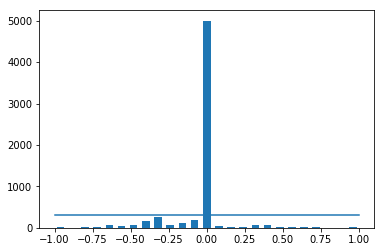

In [0]:
sampels_per_bin =300
plt.bar(center,hist,width=0.05)
plt.plot((np.min(dt_copy["steering"]),(np.max(dt_copy["steering"]))),(sampels_per_bin,sampels_per_bin))

In [0]:
remove_list=[]
for i in range(num_bins):
  list=[]
  for j in range(len(dt["steering"])):
    if dt["steering"][j]>=bins[i] and dt["steering"][j]<=bins[i+1]:
      list.append(j)
#   list=shuffle(list)
  list=list[sampels_per_bin:]
  remove_list.extend(list)

In [0]:
len(remove_list)

4699

In [0]:
dt.drop(dt.index[remove_list],inplace=True)

In [0]:
def loadImageSteering(datadir,dt):
  imagePath=[]
  steeringPath=[]
  for i in range(len(dt)):
    center=dt.iloc[i][0]
    steering=float(dt.iloc[i][1])
    imagePath.append(os.path.join(datadir,center))
    steeringPath.append(steering)
  imagePath=np.asarray(imagePath)
  steeringPath=np.asarray(steeringPath)
  return imagePath,steeringPath

In [0]:
imagePath,steeringPath=loadImageSteering(datadir+"/IMG",dt)

In [0]:
imagePath[0]
steeringPath[0]
steeringPath.shape

(1625,)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(imagePath, steeringPath, test_size=0.33, random_state=42)

In [0]:
import cv2 as cv
def imageProcessing(img):
#   img=mpimg.imread(path)
  img=img[60:135,:,:]
  img=cv.cvtColor(img,cv.COLOR_RGB2YUV)
  img=cv.GaussianBlur(img,(3,3),0)
  img=cv.resize(img,(200,66))
  img=img/255
  return img

TypeError: ignored

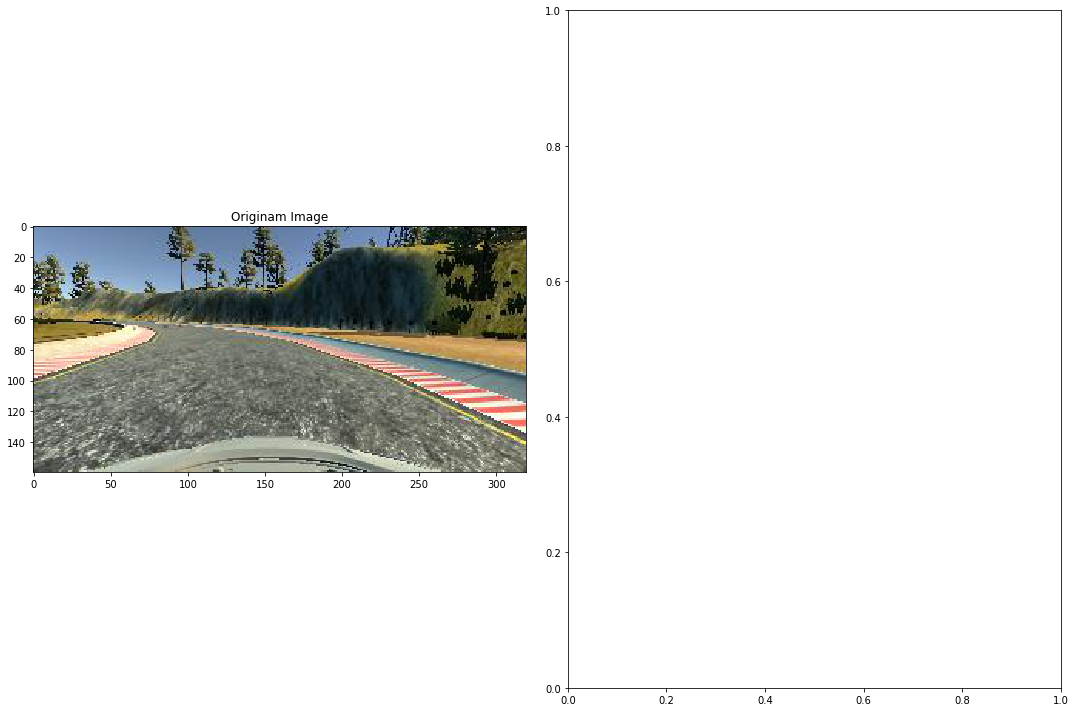

In [0]:
image=imagePath[1]
image=mpimg.imread(image)
fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].grid(False)
axs[0].set_title("Originam Image")
axs[1].imshow(imageProcessing(imagePath[1]))
axs[1].grid(False)
axs[1].set_title("Processed Image")
plt.show()

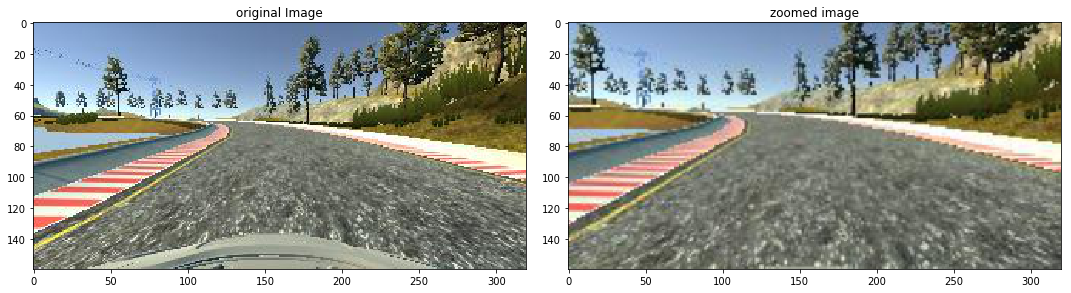

In [0]:
def zoom(image):
  zoom=iaa.Affine(scale=(1,1.4))
  image=zoom.augment_image(image)
  return image
#image selection
image=imagePath[random.randint(0,1000)]
original_image=mpimg.imread(image)
#function applied
zoomed_image=zoom(original_image)
#ploting
fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("original Image")
axs[1].imshow(zoomed_image)
axs[1].set_title("zoomed image")
plt.show()

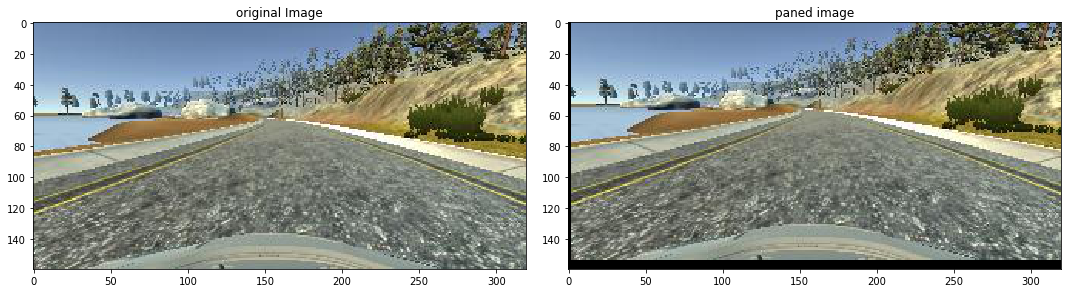

In [0]:
def pan(image):
  pan=iaa.Affine(translate_percent={"x":(-0.1,0.1),"y":(-0.1,0.1)})
  image=pan.augment_image(image)
  return image
#image selection
image=imagePath[random.randint(0,1000)]
original_image=mpimg.imread(image)
#function applied
paned_image=pan(original_image)
#ploting
fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("original Image")
axs[1].imshow(paned_image)
axs[1].set_title("paned image")
plt.show()

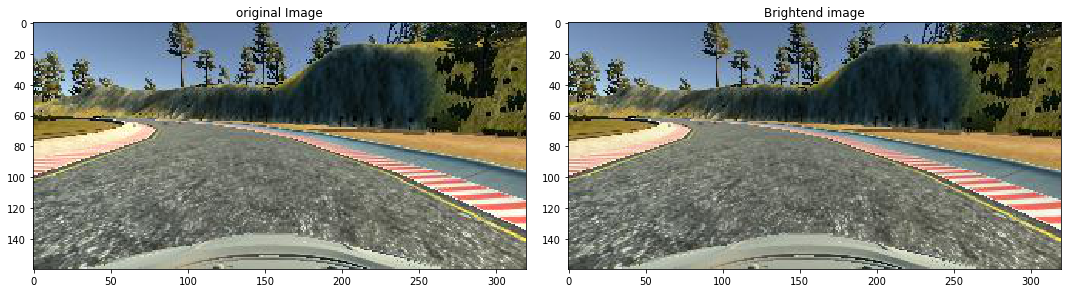

In [0]:
def img_random_brightness(image):
  brightness=iaa.Multiply((0.2,1.5))
  image=brightness.augment_image(image)
  return image
#image selection
image=imagePath[random.randint(0,1000)]
original_image=mpimg.imread(image)
#function applied
brightend_image=img_random_brightness(original_image)
#ploting
fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("original Image")
axs[1].imshow(brightend_image)
axs[1].set_title("Brightend image")
plt.show()

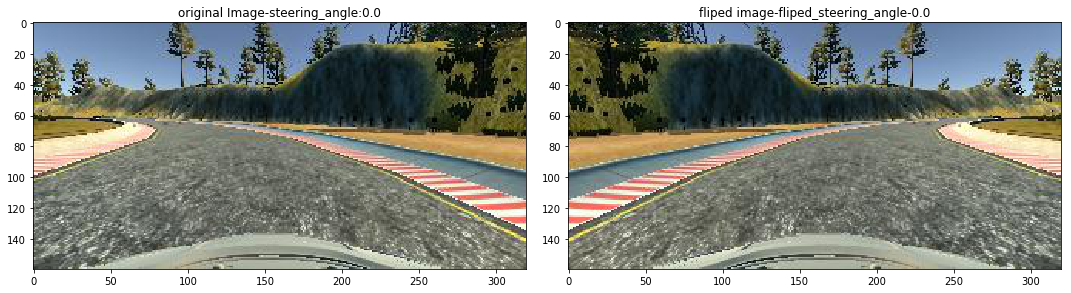

In [0]:
def img_random_flip(image,steering_angle):
  image = cv.flip(image,1)
  steering_angle=-steering_angle
  return image,steering_angle
#image selection
random_index=random.randint(0,1000)
steering_angle=steeringPath[random_index]
original_image=mpimg.imread(image)
#function applied
fliped_image,fliped_steering_angle=img_random_flip(original_image,steering_angle)
#ploting
fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("original Image-"+"steering_angle:"+str(steering_angle))
axs[1].imshow(fliped_image)
axs[1].set_title("fliped image-fliped_steering_angle"+str(fliped_steering_angle))
plt.show()


In [0]:
np.random.rand()

0.9904337128759487

In [0]:
def random_augment(image,steering_angle):
  image=mpimg.imread(image)
  if np.random.rand()<0.5:
    image=zoom(image)
  if np.random.rand()<0.5:
    image=pan(image)
  if np.random.rand()<0.5:
    image=img_random_brightness(image)
  if np.random.rand()<0.5:
    image,steering_angle=img_random_flip(image,steering_angle)
  
  return image,steering_angle

In [0]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = imageProcessing(im)
      batch_img.append(im)
      batch_steering.append(steering)
      
    yield (np.asarray(batch_img), np.asarray(batch_steering))

In [0]:

def nvidiaModel():
  model = Sequential()
  model.add(Conv2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation="elu"))
  model.add(Conv2D(36,(5,5),strides=(2,2),activation="elu"))
  model.add(Conv2D(48,(5,5),strides=(2,2),activation="elu")) 
  model.add(Conv2D(64,(3,3),activation="elu"))   
  model.add(Conv2D(64,(3,3),activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  
  model.add(Dense(100,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(50,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(10,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(1))
  model.compile(optimizer=Adam(lr=1e-3),loss="mse")
  
  return model

In [0]:
mymodel= nvidiaModel()

W0719 13:25:57.849612 140195188508544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 13:25:57.884275 140195188508544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 13:25:57.890238 140195188508544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 13:25:57.963097 140195188508544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0719 13:25:57.975470 

In [0]:
history = mymodel.fit_generator(batch_generator(x_train, y_train, 100, True),
                                  steps_per_epoch=300, 
                                  epochs=5,
                                  validation_data=batch_generator(x_test, y_test, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

W0719 13:25:58.405014 140195188508544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
300/300 [==============================] - 144s 479ms/step - loss: 0.1596 - val_loss: 0.0916
Epoch 2/5
300/300 [==============================] - 133s 445ms/step - loss: 0.1211 - val_loss: 0.0876
Epoch 3/5
300/300 [==============================] - 134s 445ms/step - loss: 0.1187 - val_loss: 0.0881
Epoch 4/5
300/300 [==============================] - 132s 441ms/step - loss: 0.1136 - val_loss: 0.0881
Epoch 5/5
300/300 [==============================] - 129s 431ms/step - loss: 0.1088 - val_loss: 0.0930


In [0]:
mymodel.save("model.h5")

In [0]:
# aboutdrop=(dt.steering>-0.04) &(dt.steering<0.04) 
# test=dt_copy.drop(dt[aboutdrop].index[300:])
# num_bins=25
# hist,bins=np.histogram(test["steering"],num_bins)


In [0]:
# center=(bins[:-1]+bins[1:])*0.5

In [0]:
sampels_per_bin =300
plt.bar(center,hist,width=0.05)
plt.plot((np.min(test["steering"]),(np.max(test["steering"]))),(sampels_per_bin,sampels_per_bin))